# Detecting and Recognizing Faces

- Understanding Haar cascades.
- Finding the pre-trained Haar cascades that come with OpenCV. These includeseveral face detectors.
- Using Haar cascades to detect faces in still images and videos.
- Gathering images to train and test a face recognizer.
- Using several different face recognition algorithms: Eigenfaces, Fisherfaces, and Local Binary Pattern Histograms (LBPHs).
- Copying rectangular regions from one image to another, with or without a mask.
- Using a depth camera to distinguish between a face and the background basedon depth.
- Swapping two people's faces in an interactive application

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

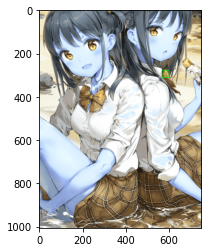

In [2]:
face_cascade = cv2.CascadeClassifier('./cascades/haarcascade_frontalface_default.xml')
img = cv2.imread('./woodcutters.jpeg')
gray = cv2.cvtColor(img, code=cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.08, minNeighbors=5)
for (x, y, w, h) in faces:
    img = cv2.rectangle(img, pt1=(x,y), pt2=(x+w,y+h), color=(0, 255, 0), thickness=2)
cv2.imwrite('./woodcutters_detected.jpg', img)

# this is so sad :v most of the woods are classified as a human face
plt.imshow(img)

In [4]:
face_cascade.detectMultiScale?

Docstring:
detectMultiScale(image[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize]]]]]) -> objects
.   @brief Detects objects of different sizes in the input image. The detected objects are returned as a list
.       of rectangles.
.   
.       @param image Matrix of the type CV_8U containing an image where objects are detected.
.       @param objects Vector of rectangles where each rectangle contains the detected object, the
.       rectangles may be partially outside the original image.
.       @param scaleFactor Parameter specifying how much the image size is reduced at each image scale.
.       @param minNeighbors Parameter specifying how many neighbors each candidate rectangle should have
.       to retain it.
.       @param flags Parameter with the same meaning for an old cascade as in the function
.       cvHaarDetectObjects. It is not used for a new cascade.
.       @param minSize Minimum possible object size. Objects smaller than that are ignored.
.       @param maxSi

### Eye Detection

```py
eye_cascade = cv2.CascadeClassifier('./cascades/haarcascade_eye.xml')

videoPath = './video.mp4'
videoCapture = cv2.VideoCapture(videoPath)

while (cv2.waitKey(1) == -1):
    # Iterating each video frame
    success, frame = videoCapture.read()
    if success:
        # convert the frame to grayscale (for easier face detection)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # detect faces from the grayscale img
        faces = face_cascade.detectMultiScale(gray, 1.3, 5, minSize=(120, 120))
        for x, y, w, h in faces:
            # draw a rectangle around detected faces
            cv2.rectangle(frame, (x,y), (x + w, y + h), (0, 255, 0), 2)
            # crop the face area of the grayscale img. We may crop the top half of the img for better eyes detection
            roi_gray = gray[y:y+int(h/2), x:x+w]
            # detect eyes region from the cropped area of a face
            eyes = eye_cascade.detectMultiScale(roi_gray, 1.03, 5, minSize=(40,40))
            for (ex, ey, ew, eh) in eyes:
                # draw rect around the eyes
                cv2.rectangle(frame, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (255, 0, 0), 2)
        # cv2.imshow('Face Detection', frame)
```

## Face Recognition